In [1]:
__author__ = 'Brian Merino <brian.merino@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20251230' # aaaammdd; marca de fecha de la versión de este notebook
__keywords__ = ['AladinLite','des','skymapper','globular clusters','ipyaladin']

# Visualizando imágenes y catálogos con Aladin Lite v3
*Brian Merino (NSF NOIRLab/CSDC)*

## Tabla de contenido
* [Objetivos](#goals)
* [Resumen](#summary)
* [Avisos legales y atribuciones](#disclaimer)
* [Importaciones y configuración](#imports)
* [Iniciar visor de Aladin](#Aladin)
* [Accediendo a los datos](#Data)
* [Herramienta de servicio de acceso simple a imágenes (SIA)](#SIA)
* [Consultar los datos de imágenes des_dr2](#des_dr2)
* [Consultando la base de datos del Data Lab](#Query)
* [Tabla superpuesta](#overlay_table)
* [Diagrama Color-Magnitud](#CMD)

<a class="anchor" id="goals"></a>
# Objectivos
Demuestrar cómo desplegar datos de imágenes y catálogos con AladinLite Viewer en un notebook (usando ipyaladin). Los datos de imágenes y catálogos se obtendrán a través de los servicios de datos de Data Lab.

<a class="anchor" id="summary"></a>
# Resumen
<a href="https://aladin.cds.unistra.fr/AladinLite/doc/">AladinLite</a> es un atlas interactivo del cielo que se ejecuta en su navegador. Aladin permite a los usuarios explorar el cielo y mostrar imágenes. Además, permite la superposición de objetos del catálogo, facilitando la identificación de los objetos. <a href="https://github.com/cds-astro/ipyaladin">ipyaladin</a> se creó para permitir que los Notebooks Jupyter  utilicen la funcionalidad de Aladin Lite. Este notebook demostrará cómo utilizar ipyaladin para mostrar imágenes y superponer datos del catálogo de surveys, lo que ayudaría a identificar conjuntos de datos superpuestos. 

Visualizar surveys como este permite a los usuarios explorar si un survey ya ha observado una fuente de interés. Al ejecutar una búsqueda de conos y superponer los objetos encontrados, se puede comprobar si las fuentes visibles en las imágenes tienen contrapartes en catálogos específicos, lo que puede resultar beneficioso a la hora de preparar una propuesta de telescopio.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.


<a class="anchor" id="imports"></a>
# Importaciones y configuración

In [2]:
# Biblioteca estándar
from getpass import getpass
import time

# Bibliotecas de terceros
import numpy as np
from matplotlib.colors import PowerNorm
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.wcs import WCS
from astropy.table import Table
from astropy.utils.data import download_file
from astropy.io import fits
from astropy.coordinates import SkyCoord
from pyvo.dal import sia
from ipyaladin import Aladin
from sidecar import Sidecar

# Laboratorio de datos
from dl import authClient as ac, queryClient as qc  

%matplotlib inline

<a class="anchor" id="Aladin"></a>
# Inicie el Visor de Aladin

Comencemos abriendo un visor Aladin Lite usando SideCar. Al ejecutar la siguiente celda se abrirá una nueva ventana a la derecha de donde se muestran las celdas del notebook. 

Nota: No es necesario utilizar Sidecar para establecer una sesión de visor de Aladin Lite. Si simplemente ejecutara la primera línea del bloque de celdas, Aladin Lite se abriría debajo del bloque de código. Aún podrías interactuar con el espectador y utilizar todas las herramientas de Aladin Lite, pero la sesión permanecería debajo de este bloque de código, lo que significa que tendrías que desplazarte hacia arriba hasta esta celda cada vez que quisieras visitar al espectador.

In [3]:
aladin = Aladin(full_screen=True)
with Sidecar(title="aladin_output",anchor='split-right'):
    display(aladin)

# Si prefiere que el visor Aladin se muestre en otro lugar que no sea el lado derecho,
# siéntete libre de descomentar el siguiente código para mostrar Aladin en la parte inferior de la pantalla.
#with Sidecar(title="aladin_output",anchor='split-bottom'):
#   display(aladin)

# La siguiente línea hará que el notebook espere tres segundos antes de continuar.
# Esto le dará tiempo al portátil para abrir Aladin Viewer antes de ejecutar
# los siguientes comandos.
time.sleep(3)

Ahora que Aladin está funcionando, centrémoslo en nuestro objetivo, el cúmulo globular NGC 1851. 

Dado que las coordenadas que estamos usando están en grados, actualicemos el marco de coordenadas que usa Aladin.

In [4]:
# Centrar Aladin en NGC 1851
ra = 78.52809 # en grados
dec = -40.04656 # en grados

target_coord = SkyCoord(ra*u.deg,dec*u.deg)
aladin.target = target_coord

# Actualizar el marco de coordenadas
aladin.coo_frame = "ICRSd"  # ICRS y ángulos expresados en grados.

A continuación, ajustemos el campo de visión (FOV) para acercarnos al objetivo.

In [5]:
aladin.fov = 0.4  # establecer el campo de visión en 0,4 grados

Después de ejecutar la celda anterior, el visor Aladin está listo para funcionar. Sin embargo, siéntase libre de ajustar el visor a tu gusto. Al interactuar directamente con el espectador, puede hacer clic en los botones '+' o '-' ubicados en la parte inferior izquierda del visor para acercar o alejar. Además, puede hacer clic y arrastrar a cualquier lugar de la pantalla del espectador para ajustar el centro. También puede cambiar la extensión de la imagen haciendo clic derecho en el visor y arrastrando el mouse para ajustar el brillo.

<a class="anchor" id="Data"></a>
# Accediendo a los datos

En este notebook, accederemos a dos conjuntos de datos diferentes. Primero, usaremos la herramienta de servicio Simple Image Access (SIA) para acceder a datos de imágenes de The **D**ark **E**negery **S**urvey [(**DES**)](https://datalab.noirlab.edu/des/index.php), luego usaremos el cliente de consulta para acceder a la cuarta publicación de datos [**SkyMapper**](https://datalab.noirlab.edu/data/skymapper) para identificar fuentes cercanas a nuestro objetivo. 

Nota: Si desea saber dónde encontrar la URL utilizada aquí, consulte esta [página del manual del usuario de Astro Data Lab](https://datalab.noirlab.edu/docs/manual/UsingAstroDataLab/DataAccessInterfaces/SimpleImageAccessSIA/SimpleImageAccessSIA.html?highlight=sia) para obtener la lista de URL de recopilación de imágenes y otra información útil sobre el uso de la herramienta SIA. 

### Autenticación

Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas capacidades, como guardar los resultados de sus consultas en su espacio de almacenamiento virtual, requieren un inicio de sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, elimine el comentario de la primera línea de código en la celda siguiente y ejecútela:

In [6]:
# token = ac.login(input("Ingrese el nombre de usuario: (+ENTER) "), getpass("Ingrese la contraseña: (+ENTER) "))
ac.whoAmI()

'demo01'

<a class="anchor" id="SIA"></a>
# Herramienta de servicio SIA

Para acceder a la herramienta de servicio SIA, necesitamos establecer la URL que apunta a la colección que contiene las imágenes que nos interesan. Para este ejemplo, accederemos a los datos de la colección de imágenes des_dr2.

In [7]:
DEF_ACCESS_URL = "https://datalab.noirlab.edu/sia/des_dr2"
svc_des_dr2 = sia.SIAService(DEF_ACCESS_URL)

<a class="anchor" id="des_dr2"></a>
# Consultar los datos de imágenes des_dr2.

Dado que estamos trabajando con datos para el cúmulo globular NGC 1851 (AR = 78,52809 grados y Dec = -40,04656 grados), buscaremos las imágenes correspondientes en la colección de imágenes des_dr2 alrededor de estas coordenadas. Dado que el parámetro fov espera valores en grados, no es necesario utilizar un valor grande.

In [8]:
fov = 0.2 # en grados
imgTable_des_dr2 = svc_des_dr2.search((ra,dec), (fov/np.cos(dec*np.pi/180), fov), verbosity=2).to_table()
print(f"Hay {len(imgTable_des_dr2)} coincidencias.")

Hay 33 coincidencias.


Vista previa de la tabla

In [9]:
imgTable_des_dr2

assoc_id,access_url,access_format,access_estsize,dataproduct_type,dataproduct_subtype,calib_level,dataset_length,im_nsubarrays,im_naxes,im_naxis,im_pixtype,im_wcsaxes,im_scale,obs_title,obs_id,obs_creator_name,obs_collection,obs_creation_type,obs_creation_date,facility_name,instrument_name,obs_bandpass,obs_datasource,proposal_id,obs_publisher_did,obs_release_date,preview,target_name,target_class,s_ra,s_dec,s_fov,s_region,s_calib_status,s_resolution,em_min,em_max,em_resolution,em_res_power,t_min,t_max,t_exptime,t_resolution,o_ucd,o_unit,pol_states,object,airmass,project_code,magzero,prodtype,seeing,fwhm,fileset_id,exptime,photflag,proctype,date_obs,mjd_obs,elliptic
,,,bytes,,,,,,,,,,deg,,,,,,,,,,,,,,,,,deg,deg,deg,deg,,arcsec,m,m,m,,d,d,s,s,,,,,,,,,,,,,,,,,
object,object,object,int32,object,object,int64,int64,int32,int32,object,object,object,object,object,object,object,object,object,object,str1,object,object,object,object,object,object,object,object,object,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
des_dr2,"https://datalab.noirlab.edu/svc/cutout?col=des_dr2&siaRef=DES0515-3957_r4939p01_Y.fits.fz&extn=1&POS=78.52809,-40.04656&SIZE=0.2612596901922403,0.2",image/fits,169453,,,3,0,0,2,[10000 10000],,,[0.26296],,des_dr2,,DES DR2,archival,,,DECam,Y,,,ivo://datalab.noirlab/vo#ivoa_des_dr2.siav1:ivo://datalab.noao/des_dr2/DES0515-3957_r4939p01_Y.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=des_dr2&siaRef=DES0515-3957_r4939p01_Y.fits.fz&extn=1&POS=78.52809,-40.04656&SIZE=0.2612596901922403,0.2&preview=true",,,78.9264,-39.9601,--,,,--,1130.0,1130.0,--,--,--,--,--,--,,,,DES0515-3957,0,DES DR2,30,image,0,0,,585,,Stack,,56615.32558215,0
des_dr2,"https://datalab.noirlab.edu/svc/cutout?col=des_dr2&siaRef=DES0515-3957_r4939p01_Y.fits.fz&extn=2&POS=78.52809,-40.04656&SIZE=0.2612596901922403,0.2",image/fits,169453,,,3,0,0,2,[10000 10000],,,[0.26296],,des_dr2,,DES DR2,archival,,,DECam,Y,,,ivo://datalab.noirlab/vo#ivoa_des_dr2.siav1:ivo://datalab.noao/des_dr2/DES0515-3957_r4939p01_Y.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=des_dr2&siaRef=DES0515-3957_r4939p01_Y.fits.fz&extn=2&POS=78.52809,-40.04656&SIZE=0.2612596901922403,0.2&preview=true",,,78.9264,-39.9601,--,,,--,1130.0,1130.0,--,--,--,--,--,--,,,,DES0515-3957,0,DES DR2,30,image,0,0,,585,,Stack,,56615.32558215,0
des_dr2,"https://datalab.noirlab.edu/svc/cutout?col=des_dr2&siaRef=DES0515-3957_r4939p01_Y.fits.fz&extn=3&POS=78.52809,-40.04656&SIZE=0.2612596901922403,0.2",image/fits,169453,,,3,0,0,2,[10000 10000],,,[0.26296],,des_dr2,,DES DR2,archival,,,DECam,Y,,,ivo://datalab.noirlab/vo#ivoa_des_dr2.siav1:ivo://datalab.noao/des_dr2/DES0515-3957_r4939p01_Y.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=des_dr2&siaRef=DES0515-3957_r4939p01_Y.fits.fz&extn=3&POS=78.52809,-40.04656&SIZE=0.2612596901922403,0.2&preview=true",,,78.9264,-39.9601,--,,,--,1130.0,1130.0,--,--,--,--,--,--,,,,DES0515-3957,0,DES DR2,30,image,0,0,,585,,Stack,,56615.32558215,0
des_dr2,"https://datalab.noirlab.edu/svc/cutout?col=des_dr2&siaRef=DES0515-3957_r4939p01_Y_nobkg.fits.fz&extn=1&POS=78.52809,-40.04656&SIZE=0.2612596901922403,0.2",image/fits,169453,,,3,0,0,2,[10000 10000],,,[0.26296],,des_dr2,,DES DR2,archival,,,DECam,Y,,,ivo://datalab.noirlab/vo#ivoa_des_dr2.siav1:ivo://datalab.noao/des_dr2/DES0515-3957_r4939p01_Y_nobkg.fits.fz,,"https://datalab.noirlab.edu/svc/cutout?col=des_dr2&siaRef=DES0515-3957_r4939p01_Y_nobkg.fits.fz&extn=1&POS=78.52809,-40.04656&SIZE=0.2612596901922403,0.2&preview=true",,,78.9264,-39.9601,--,,,--,1130.0,1130.0,--,--,--,--,--,--,,,,DES0515-3957,0,DES DR2,30,image,0,0,,585,,Stack,,56615.32558215,0
des_dr2,"https://datalab.noirlab.edu/svc/cutout?col=des_dr2&siaRef=DES0515-3957_r4939p01_Y_nobkg.fits.fz&extn=2&POS=78.52809,-40.04656&SIZE=0.2612596901922403,0.2",image/fits,169453,,,3,0,0,2,[10000 

Ahora que tenemos una tabla de imágenes, seleccionaremos tres bandas diferentes para ver cómo luce el cúmulo en cada una. Se toman varias imágenes con cada filtro. Aquí, seleccionaremos la primera imagen para cada filtro tal como aparece en la tabla. 

Siéntase libre de cambiar la fila utilizada para seleccionar la imagen para ver cómo las observaciones tomadas con el mismo filtro difieren en apariencia. 

Para acceder a las imágenes, podemos usar sus números de fila de la tabla de imágenes para descargarlas directamente en el notebook.

In [10]:
def download_image(row_val):
    '''Tome un número de fila de la tabla de imágenes, 
    luego devuelve una imagen, una URL de acceso y su información WCS.
    '''
    row = imgTable_des_dr2[row_val]
    url = row['access_url']
    filename = download_file(url, cache=True, show_progress=False, timeout=120)
    hdu = fits.open(filename)[0]
    image = hdu.data
    hdr = hdu.header
    wcs = WCS(hdr)

    return image, url, wcs

In [11]:
# Imagen 1 - Banda Y
image1, url1, wcs1 = download_image(0)

# Imagen 2 - banda z
image2, url2, wcs2 = download_image(27)

# Imagen 3 - banda i
image3, url3, wcs3 = download_image(15)

Grafiquemos las tres imágenes descargadas con matplotlib.

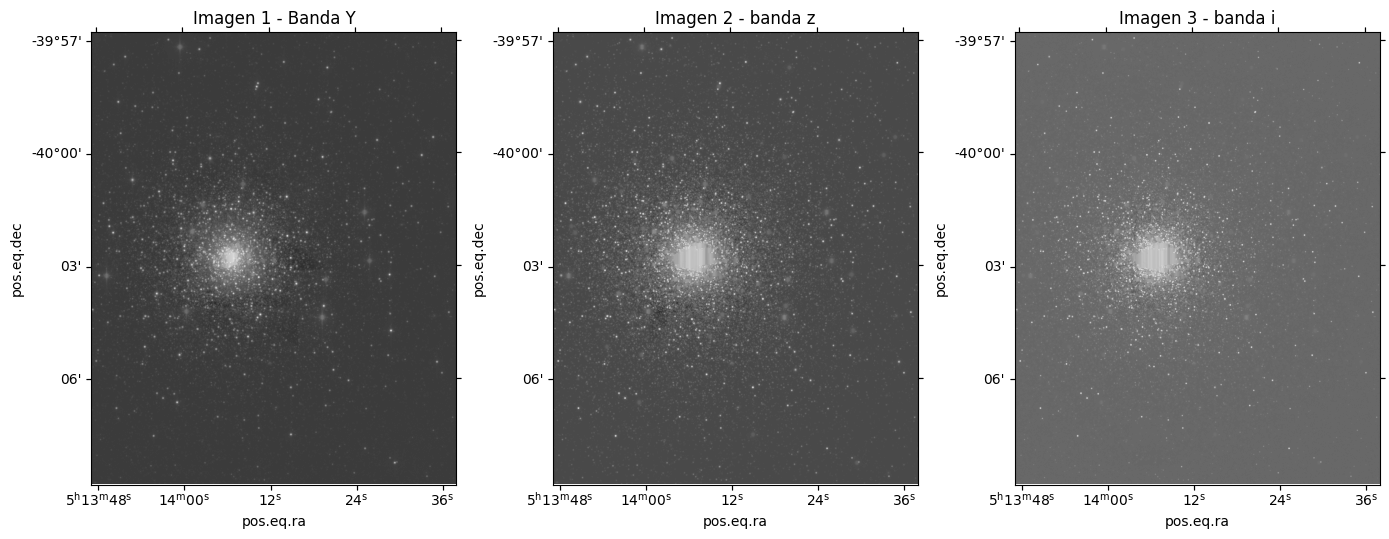

In [12]:
gamma = 0.25
fig = plt.figure(figsize=(14, 10))

ax1 = fig.add_subplot(1, 3, 1, projection=wcs1)
im1 = ax1.imshow(image1, origin='lower', cmap='Greys_r', norm=PowerNorm(gamma))
ax1.set_title('Imagen 1 - Banda Y')

ax2 = fig.add_subplot(1, 3, 2, projection=wcs2)
im2 = ax2.imshow(image2, origin='lower', cmap='Greys_r', norm=PowerNorm(gamma))
ax2.set_title('Imagen 2 - banda z')

ax3 = fig.add_subplot(1, 3, 3, projection=wcs3)
im3 = ax3.imshow(image3, origin='lower', cmap='Greys_r', norm=PowerNorm(gamma))
ax3.set_title('Imagen 3 - banda i')

plt.tight_layout()
plt.show()

Aquí podemos ver cómo se ve NGC 1851 en las bandas Y, z e i. La banda más roja, la banda Y, muestra la población estelar más antigua. Las bandas más azules, específicamente las bandas z e i, muestran más estrellas, siendo la banda z la que muestra la mayor cantidad de estrellas. Esto nos dice que la mayoría de las estrellas en este cúmulo alcanzan su punto máximo entre 850 y 950 nm.

<a class="anchor" id="overlay_image"></a>
# Superponer imágenes en Aladin

Después de graficar las tres imágenes, podemos verificar que son de la misma fuente, pero no son idénticas. 

Ahora podemos usar la función add_fits() para superponer las imágenes en Aladin. De forma predeterminada, Aladin establece la opacidad de cada imagen en 1,0, lo que significa que el cielo mostrado por el visor de Aladin no será visible detrás de la imagen. Si desea que la imagen sea ligeramente transparente, puede cambiar el valor para que sea algo menor que uno. Para este ejemplo, estableceremos la opacidad al 100%, lo que le permitirá ver la imagen con claridad. Sin embargo, siéntase libre de variar el valor de opacidad para ver cómo aparece la imagen contra el fondo. No olvide descomentar los comandos add_fits para las bandas Y e i para que pueda ver cómo se ven en el cielo.

In [13]:
# Agregar imagen de banda Y a Aladin
# aladin.add_fits(url1,nombre='banda Y',opacidad=1.0)

# Agregar imagen de banda z a Aladin
aladin.add_fits(url2,name='z band',opacity=1.0)

# Agregar imagen de banda i a Aladin
# aladin.add_fits(url3,nombre='banda I',opacidad=1.0)

Después de agregar las imágenes a Aladin, el espectador se desplazará ligeramente, alejando nuestro objetivo del centro del campo de visión. Puede volver a centrar el FOV volviendo a ejecutar el comando aladin.target que utilizamos anteriormente en este notebook. 

Nota: Si selecciona "Ejecutar todas las celdas", Jupyter no le da a Aladin tiempo suficiente para actualizar el visor, por lo que es posible que se omita este comando. Si esto le sucede, regrese a esta celda y ejecútelo nuevamente.

In [14]:
aladin.target = target_coord

<a class="anchor" id="consulta"></a>
# Consultar el Data Lab

Ahora que sabemos cómo trabajar con imágenes, consultemos los catálogos de Data Lab para obtener fotometría de estrellas individuales dentro y alrededor de nuestro objetivo. Usaremos la versión 4 de datos de SkyMapper. Solo necesitamos las columnas ra_img, dec_img y object_id para este ejemplo. 

Según [Edward W. Olszewski et al. 2009](https://ui.adsabs.harvard.edu/abs/2009AJ....138.1570O/abstract#:~:text=Seitzer%2C%20Patrick-,Abstract,may%20have%20once%20been%20embedded.&text=Keywords:,Astrophysics%20%2D%20Astrophysics%20of%20Galaxies), NGC 1851 tiene un diámetro angular de aproximadamente 11 minutos de arco, lo que se traduce en aproximadamente 0,2 grados. Entonces, realizaremos una búsqueda de conos centrados en el cúmulo globular con un radio de 0,1 grados. 

El survey SkyMapper contiene decenas de miles de puntos de datos dentro de nuestro cono de búsqueda. Si superpusiéramos los puntos de datos tal como están, la imagen quedaría oscurecida por una capa de marcadores de datos, bloqueando completamente nuestra visión del cúmulo globular. Para resolver esto, aplicaremos un límite de magnitud a nuestra consulta para que solo se devuelvan fuentes con magnitudes de banda z inferiores a 17, lo que reduce la cantidad de regiones que superponemos en Aladin.

In [15]:
sql = '''SELECT raj2000, dej2000, z_psf, object_id
            FROM skymapper_dr4.master
            WHERE Q3C_RADIAL_QUERY(raj2000,dej2000,{0},{1},{2}) 
            AND z_psf < 17
'''.format(ra, dec, 0.1)
df = qc.query(sql=sql, fmt='pandas')
df

,raj2000,dej2000,z_psf,object_id
0,78.461009,-40.113166,15.4660,18814683
1,78.461172,-40.098773,16.9116,18814684
2,78.482516,-40.125549,15.2089,18814685
3,78.488081,-40.108811,15.4233,18814690
4,78.484566,-40.106664,15.7141,18814693
...,...,...,...,...
562,78.578968,-39.976615,14.8511,18818053
563,78.585451,-39.975905,16.7421,18818056
564,78.614458,-39.972310,16.4244,18818058
565,78.584157,-39.962496,14.5016,18818060


<a class="anchor" id="overlay_table"></a>
# Tabla de superposición

Ahora estamos casi listos para superponer los datos de esta tabla en Aladin. Pero antes de que podamos superponer nuestra tabla, primero debemos convertirla de una 
marco de datos de pandas a una tabla. 

Finalmente, podemos usar la función incluída en Aladin add_table() para agregar los puntos a nuestro visor de Aladin.

In [16]:
t = Table.from_pandas(df)

aladin.add_table(
    t,
    shape='circle',
    source_size=15,
    color='green')

El survey SkyMapper tenía como objetivo capturar objetos de magnitud entre 9 y 22, lo que explica por qué las estrellas más brillantes en el centro del cúmulo no son visibles en la pantalla.

<a class="anchor" id="CMD"></a>
# Diagrama Color Magnitud

Ahora que hemos visualizado los datos, aprendamos un poco más sobre el cúmulo globular. Usando los datos de Skymapper Data Release 4, construyamos un diagrama de color-magnitud (DCM). 

Nuestra consulta inicial obtuvo suficientes datos para visualizar las estrellas cerca y alrededor del cúmulo, pero no hay suficientes puntos de datos para producir un buen DCM. Para solucionar este problema, repetiremos nuestra consulta, pero esta vez estableceremos el radio de la búsqueda del cono igual al diámetro angular completo del grupo, 0,2 grados. Ampliar la búsqueda del cono aumentará la cantidad de puntos de datos para el DCM, lo que nos permitirá identificar características clave del diagrama. 

El DCM graficará la magnitud vs color. Usaremos la banda i para la magnitud, pero aún necesitamos determinar el color, que se define como la diferencia entre dos magnitudes de diferentes filtros. Esta diferencia de magnitudes sirve como medida cuantitativa de la temperatura del cúmulo.

In [17]:
# Repita la consulta con un radio de cono más amplio.
# Esta vez, también obtendremos las magnitudes de las bandas g e i.
sql2 = '''SELECT raj2000, dej2000, g_psf, i_psf, object_id
            FROM skymapper_dr4.master
            WHERE Q3C_RADIAL_QUERY(raj2000,dej2000,{0},{1},{2}) 
'''.format(ra, dec, fov/2)
df2 = qc.query(sql=sql2, fmt='pandas')
df2

,raj2000,dej2000,g_psf,i_psf,object_id
0,78.466778,-40.134307,NaN,19.9289,1026338614
1,78.473402,-40.136577,20.7834,NaN,1026338617
2,78.466531,-40.130649,19.1446,18.6132,18814673
3,78.468610,-40.131501,20.7062,NaN,1026338621
4,78.473268,-40.134437,20.2294,19.9081,1026338622
...,...,...,...,...,...
3676,78.589181,-39.965584,20.6010,20.1009,1026348185
3677,78.588390,-39.960792,20.7580,NaN,1026348186
3678,78.588332,-39.958015,18.1991,16.9012,18818061
3679,78.599015,-39.963089,17.9197,17.5492,18818064


El color se define como la diferencia de magnitud entre dos filtros. Para el DCM que crearemos aquí, nuestro color será la diferencia entre las magnitudes en las bandas g e i, color = (g - i) = $m_g - m_i$.

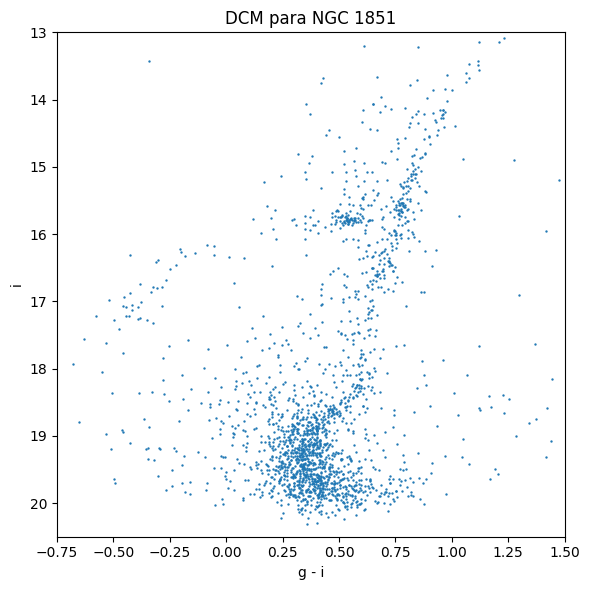

In [18]:
fig = plt.figure(figsize=(6,6))

# Graficar color (g-i) vs i
plt.scatter(df2['g_psf']-df2['i_psf'], df2['i_psf'], s=0.5)
plt.xlim(-0.75, 1.5)
plt.ylim(13, 20.5)
plt.gca().invert_yaxis()
plt.xlabel('g - i')
plt.ylabel('i')
plt.title('DCM para NGC 1851')

plt.tight_layout()
plt.show()

Este DCM en realidad puede decirnos mucho sobre el cúmulo si empleamos isócronas. Una isócrona es una curva teórica en una DCM que representa estrellas de la misma edad y composición química pero de diferentes masas. Al superponer isócronas de modelos de evolución estelar a nuestra DCM observada, podemos estimar propiedades de la población estelar, tales como:

- **Edad**
- **Metalicidad** ([Fe/H])
- **Módulo de distancia**
- **Enrojecimiento (extinción)**

Este proceso, conocido como coincidencia isócrona, nos permite interpretar el DCM en términos de las características físicas del sistema en lugar de solo la distribución de puntos. Si bien la comparación isócrona es una técnica poderosa, no la cubriremos en este notebook.